In [5]:
#1. In this lab, you will import the csv file into pandas:

import pandas as pd
df = pd.read_csv('./data/stud.csv', sep=',')
df.head()

,StudentID,Age,email,hrsStudy,FinalGrade
0,47412,20,s47412@oslomet.no,5,46.0
1,15077,22,s15077@oslomet.no,0,65.0
2,15467,27,s15467@oslomet.no,1,26.0
3,17907,21,s17907@oslomet.no,6,68.0
4,13352,333,s13352@oslomet.no,4,34.0


In [8]:
#2. You will then clean the data set so df.info() produce
df.info()
df
df.isna().sum() #check for the empty values, but this is not correct, because u got empty cell in rows 30 and 41

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         50 non-null     object 
 2   email       50 non-null     object 
 3   hrsStudy    50 non-null     object 
 4   FinalGrade  49 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    1
dtype: int64

In [11]:
#Let's replace the empty values with NaN values. 
import numpy as np
df = df.replace(r'^\s*$', np.nan, regex=True) #Replace blank values with np.nan values
df.isna().sum()

StudentID     0
Age           1
email         0
hrsStudy      1
FinalGrade    1
dtype: int64

In [13]:
#when dealing with missing values, we need to figure out if we can replace with 
#dummy values. Let say Age isn't too important in the dataset, we can replace the missing values with 0. 

df['Age'].replace(np.nan, 0, inplace = True)
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      1
FinalGrade    1
dtype: int64

In [15]:
#Since the rest of the columns contains important data, we won't replace with 0, 
#instead we delete rows containing nan data.
df.dropna(inplace = True)
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    0
dtype: int64

In [18]:
#easiest way to convert string object to int.

df['Age'] = df['Age'].astype(str).astype(int) 
df['hrsStudy'] = df['hrsStudy'].astype(str).astype(int)

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   48 non-null     int64  
 1   Age         48 non-null     int32  
 2   email       48 non-null     object 
 3   hrsStudy    48 non-null     int32  
 4   FinalGrade  48 non-null     float64
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 1.9+ KB


,StudentID,Age,hrsStudy,FinalGrade
count,48.000000,48.000000,48.000000,48.000000
mean,50338.166667,35.666667,6.395833,72.083333
std,26526.981827,52.388619,3.648022,91.362461
min,11758.000000,0.000000,0.000000,24.000000
25%,28399.750000,22.000000,3.000000,38.750000
50%,45986.500000,25.000000,7.000000,61.000000
75%,71524.000000,31.000000,10.000000,78.500000
max,99823.000000,333.000000,11.000000,673.000000


If your dataset is complete, you won't have to do all this, but its always smart to check that you get the expected datatypes when reading a file

Converting values from int to float can be done by df[list("Age")] = df[list("Age")].astype(float)

<Axes: >

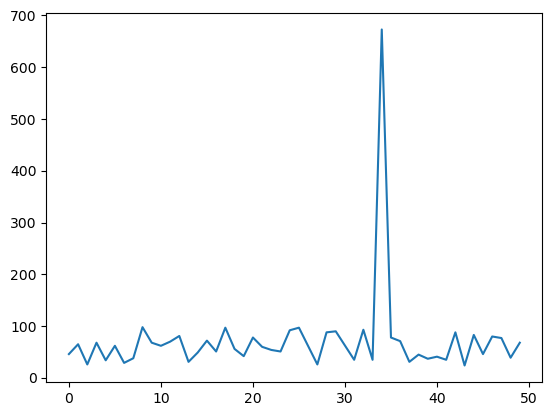

In [20]:
#3. Then idenify and remove the outliers in the «FinalGrade» column
df['FinalGrade'].plot.line()

<Axes: >

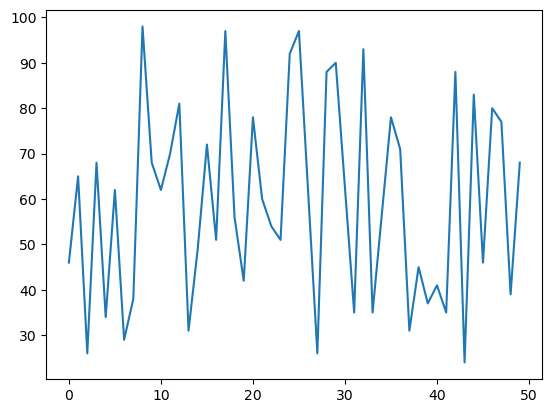

In [24]:
# remove the outliers by calculate the z score 
from scipy import stats
z_scores = stats.zscore(df['FinalGrade'])
abs_z_scores = np.abs(z_scores)

#And drop all rows in the third quantile
df.drop(df[abs_z_scores > 3].index, inplace = True)
df['FinalGrade'].plot.line()

In [25]:
df.tail(5)

,StudentID,Age,email,hrsStudy,FinalGrade,Grade
45,62039,23,s62039@oslomet.no,4,46.0,F
46,42989,27,s42989@oslomet.no,0,80.0,C
47,85370,29,s85370@oslomet.no,2,77.0,C
48,63135,26,s63135@oslomet.no,9,39.0,F
49,28895,19,s28895@oslomet.no,10,68.0,D


In [26]:
#As you can see, the index counts to 49, but we have dropped several values, we reset the index 

df = df.reset_index(drop=True)
df.tail(5)

,StudentID,Age,email,hrsStudy,FinalGrade,Grade
42,62039,23,s62039@oslomet.no,4,46.0,F
43,42989,27,s42989@oslomet.no,0,80.0,C
44,85370,29,s85370@oslomet.no,2,77.0,C
45,63135,26,s63135@oslomet.no,9,39.0,F
46,28895,19,s28895@oslomet.no,10,68.0,D


In [21]:
#4. Finally add a column "Grade " where you transform the grade from float to a char

conditions = [(df['FinalGrade'] <= 50.0),
            (df['FinalGrade'] > 50.0) & (df['FinalGrade'] <= 60.0),
            (df['FinalGrade'] > 60.0) & (df['FinalGrade'] <= 70.0),
            (df['FinalGrade'] > 70.0) & (df['FinalGrade'] <= 80.0),
            (df['FinalGrade'] > 80.0) & (df['FinalGrade'] <= 90.0),
            (df['FinalGrade'] > 90.0)
            ]
#create a list of the values we want to assign for each conditions
values =['F', 'E', 'D', 'C', 'B', 'A']

#create a new column and use np.select to assign values to it using our list as arguments 
df['Grade'] = np.select(conditions, values) 
df.head() 


,StudentID,Age,email,hrsStudy,FinalGrade,Grade
0,47412,20,s47412@oslomet.no,5,46.0,F
1,15077,22,s15077@oslomet.no,0,65.0,D
2,15467,27,s15467@oslomet.no,1,26.0,F
3,17907,21,s17907@oslomet.no,6,68.0,D
4,13352,333,s13352@oslomet.no,4,34.0,F


In [28]:
#5. Produce this plot 
% groupby gives the no. of different grades got
df_gradeCount = df.groupby('Grade').count()
df_gradeCount.FinalGrade

Grade
A     5
B     5
C     6
D     7
E     5
F    19
Name: FinalGrade, dtype: int64

<Axes: xlabel='Grade'>

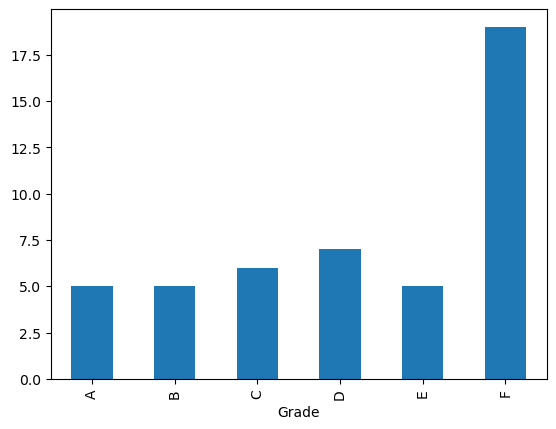

In [29]:
df_gradeCount['FinalGrade'].plot.bar()